In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from utils import scale_normalize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read Dataset

In [2]:
df = pd.read_csv("./data/diabetes_processed.csv")
df = df.iloc[: , 1:] # Drop first column of dataframe

## Scale & Normalize Data

In [3]:
features = ["Pregnancies", "Glucose", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "DiabetesRisk", "Outcome"]
scaled_df = scale_normalize(df=df, features=features)

## Split Data

In [4]:
# separate the dataframe onto features and target
features_df = scaled_df.drop("Outcome", axis="columns")
target_df = df[['Outcome']]

# split the data on test and train
X_train, X_test, y_train, y_test = \
    train_test_split(features_df, target_df, test_size=0.2, random_state=25)
X_train.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,DiabetesRisk
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,-0.000901,0.012476,0.012192,0.002368,0.007752,0.024265,0.013011
std,1.012489,1.011829,1.010449,1.004225,1.034108,0.996093,0.998618
min,-1.141852,-3.783654,-0.692891,-4.060474,-1.189553,-1.041549,-1.766465
25%,-0.844885,-0.685236,-0.692891,-0.595578,-0.687458,-0.786286,-0.832383
50%,-0.250952,-0.121888,-0.397672,0.000942,-0.322779,-0.360847,-0.037419
75%,0.639947,0.629244,0.435886,0.584771,0.467737,0.660206,0.678048
max,3.906578,2.444478,6.652839,4.455807,5.883565,3.297926,2.705205


## Train Model

In [5]:
# create a model
model = SVC(random_state=25, C=1000, gamma=0.01)
model.fit(X_train, y=np.ravel(y_train))

SVC(C=1000, gamma=0.01, random_state=25)

## Test Model

F1 Score: 0.790278650743767
Accuracy Score: 0.8311688311688312
Precision Score: 0.8403361344537814
Recall Score: 0.7698458023986294


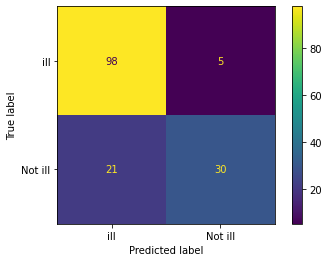

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# let the model predict the results
model_pred = model.predict(X_test)

# print the scores
print("F1 Score: {}".format(f1_score(y_test, model_pred, average="macro")))
print("Accuracy Score: {}".format(accuracy_score(y_test, model_pred)))
print("Precision Score: {}".format(precision_score(y_test, model_pred, average="macro")))
print("Recall Score: {}".format(recall_score(y_test, model_pred, average="macro")))

# plot the confusion matrix
cm = confusion_matrix(y_test, model_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ill", "Not ill"])
disp.plot()
plt.show()